In [1]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data"
column_names = ['date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', 'area-damaged', 'severity', 
                'seed-tmt', 'germination', 'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg', 
                'leafspot-size', 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 
                'canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 
                'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 
                'roots', 'class']
soybean_large = pd.read_csv(url, names=column_names)

# Separate features (X) and target (y)
X = soybean_large.drop(columns=['class'])  # Features
y = soybean_large['class']  # Target

# Display metadata
print(soybean_large.info())

# Display variable information
print("Variable Information:")
print(soybean_large.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             307 non-null    object
 1   plant-stand      307 non-null    object
 2   precip           307 non-null    object
 3   temp             307 non-null    object
 4   hail             307 non-null    object
 5   crop-hist        307 non-null    object
 6   area-damaged     307 non-null    object
 7   severity         307 non-null    object
 8   seed-tmt         307 non-null    object
 9   germination      307 non-null    object
 10  plant-growth     307 non-null    object
 11  leaves           307 non-null    object
 12  leafspots-halo   307 non-null    int64 
 13  leafspots-marg   307 non-null    object
 14  leafspot-size    307 non-null    object
 15  leaf-shread      307 non-null    object
 16  leaf-malf        307 non-null    object
 17  leaf-mild        307 non-null    ob

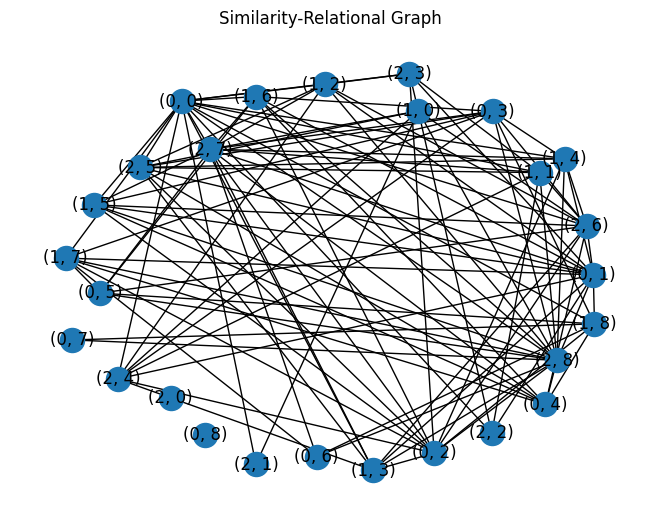

C:\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:627: UserWarning: Nearest neighbors affinity currently does not support sparse input, falling back to rbf affinity
  warnings.warn(


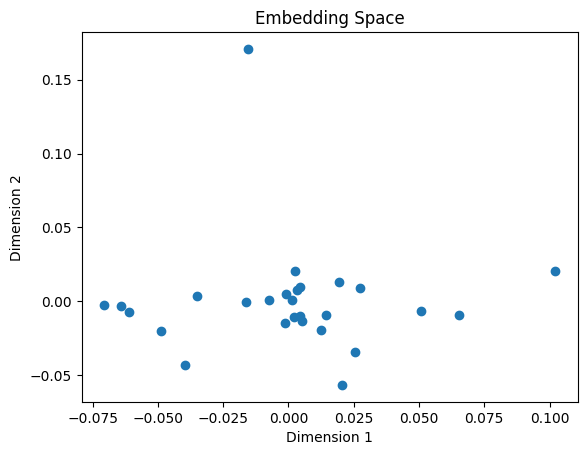

Embedding Matrix:
 [[-0.07059468 -0.00291064]
 [-0.06102268 -0.00734139]
 [ 0.10208411  0.02066195]
 [-0.03508693  0.00358063]
 [-0.00110296  0.00474474]
 [ 0.01930412  0.01270944]
 [ 0.01439878 -0.00932121]
 [ 0.02725427  0.00917776]
 [ 0.00139207  0.00105206]
 [-0.01564728  0.17090915]
 [ 0.00461143  0.00985058]
 [ 0.00234114  0.02052471]
 [-0.00729286  0.00111546]
 [ 0.06532235 -0.00935693]
 [ 0.0203511  -0.05672859]
 [-0.03961741 -0.04337748]
 [ 0.01245173 -0.01952581]
 [ 0.05092645 -0.00680259]
 [-0.06417496 -0.00323326]
 [ 0.00332181  0.00771196]
 [ 0.00514348 -0.0135088 ]
 [ 0.02533959 -0.03437627]
 [-0.04863638 -0.02009613]
 [-0.01622687 -0.00046318]
 [-0.00132692 -0.01450471]
 [ 0.0021656  -0.01064214]
 [ 0.00432191 -0.0098493 ]]


In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import OneHotEncoder
import networkx as nx
import matplotlib.pyplot as plt

def construct_similarity_graph(X):
    """
    Construct a similarity-relational graph for categorical values in X.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
         
    Returns:
    - G: NetworkX graph
         Similarity-relational graph.
    """
    # Initialize an empty graph
    G = nx.Graph()
    
    # Perform one-hot encoding to convert categorical values to numerical
    encoder = OneHotEncoder()
    X_encoded = encoder.fit_transform(X).toarray()
    
    # Compute pairwise cosine similarity between categorical values
    similarity_matrix = cosine_similarity(X_encoded)
    
    # Add nodes to the graph
    n_samples, n_features = X_encoded.shape
    for i in range(n_samples):
        for j in range(n_features):
            G.add_node((i, j))
    
    # Add edges to the graph based on cosine similarity
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            for k in range(n_features):
                for l in range(k+1, n_features):
                    sim = similarity_matrix[i, j]
                    G.add_edge((i, k), (j, l), weight=sim)
    
    return G

def graph_embedding(X, embedding_dim=2):
    """
    Perform graph embedding to learn the representation of nodes in the similarity-relational graph.
    
    Parameters:
    - X: array-like, shape (n_samples, n_features)
         Input data matrix with categorical values.
    - embedding_dim: int, default=2
                     Dimensionality of the embedding space.
                     
    Returns:
    - embedding_matrix: array-like, shape (n_samples * n_features, embedding_dim)
                        Embedding matrix representing the nodes in the graph.
    """
    # Construct similarity-relational graph
    G = construct_similarity_graph(X)
    
    # Visualize the graph
    nx.draw(G, with_labels=True)
    plt.title('Similarity-Relational Graph')
    plt.show()
    
    # Perform spectral embedding to learn the representation of nodes
    spectral_embedding = SpectralEmbedding(n_components=embedding_dim)
    embedding_matrix = spectral_embedding.fit_transform(nx.adjacency_matrix(G))
    
    # Visualize the embedding space
    plt.scatter(embedding_matrix[:, 0], embedding_matrix[:, 1])
    plt.title('Embedding Space')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()
    
    return embedding_matrix

# Example usage
# Assuming X is your categorical data matrix
X = np.array([
    ['A', 'B', 'C'],
    ['D', 'E', 'F'],
    ['G', 'H', 'I']
])

# Perform graph embedding
embedding_matrix = graph_embedding(X)
print("Embedding Matrix:\n", embedding_matrix)


In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
import pandas as pd
from sklearn.impute import SimpleImputer

# Data 
# Separate features (X) and target (y)
X = soybean_large.drop(columns=['class'])  # Features
y = soybean_large['class']  # Target


# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Function to perform clustering and calculate performance indices
def evaluate_clustering(X, y_true, method='kmeans'):
    if method == 'kmeans':
        clustering = KMeans(n_clusters=len(np.unique(y_true))).fit(X)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true))).fit(X)
    else:
        raise ValueError("Invalid clustering method. Use 'kmeans' or 'hierarchical'.")
    
    y_pred = clustering.labels_
    ari = adjusted_rand_score(y_true.values.ravel(), y_pred)
    nmi = normalized_mutual_info_score(y_true.values.ravel(), y_pred)
    fmi = fowlkes_mallows_score(y_true.values.ravel(), y_pred)

    
    return ari, nmi, fmi

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Perform clustering and evaluate with different methods
ari_kmeans, nmi_kmeans, fmi_kmeans = evaluate_clustering(X_imputed, y, method='kmeans')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y, method='hierarchical')

# Print the results
print("KMeans:")
print("Adjusted Rand Index (ARI):", ari_kmeans)
print("Normalized Mutual Information (NMI):", nmi_kmeans)
print("Folkes-Mallows Index (FMI):", fmi_kmeans)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)


C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans:
Adjusted Rand Index (ARI): 0.19831841687656587
Normalized Mutual Information (NMI): 0.38614147991914605
Folkes-Mallows Index (FMI): 0.5963641812750264

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.2005154548014219
Normalized Mutual Information (NMI): 0.387569086877829
Folkes-Mallows Index (FMI): 0.5981212181003523


Adjusted Rand Index (ARI):

Advantages:
1. ARI provides a quantitative measure of the similarity between two clustering solutions, considering all pairs of samples and their cluster memberships.
2. It adjusts for chance, offering a reference for random clustering by comparing the expected similarity of randomly clustered data with the actual clustering.
3. ARI ranges from -1 to 1, where 1 indicates perfect agreement between two clusterings.

Disadvantages:
1. ARI does not directly incorporate true data labels, making it sensitive to the number and sizes of clusters.
2. It lacks normalization and can yield negative values, which can complicate interpretation.

When to use:
1. ARI is useful when ground truth labels are available for evaluating the agreement between predicted clusters and true labels.
2. It is commonly used to assess clustering algorithms when the true clustering is known.

Normalized Mutual Information (NMI):

Advantages:
1. NMI measures the mutual dependence between true labels and predicted clusters while accounting for chance.
2. Being normalized, it consistently falls between 0 and 1, with 1 indicating perfect alignment with the true labels.
3. NMI is symmetric, meaning it is independent of the order of true labels or predicted clusters.

Disadvantages:
1. NMI may exhibit bias towards clusters with more uniform sizes and does not penalize excessive or insufficient fragmentation.

When to use:
1. NMI is suitable for evaluations aiming to assess overall agreement between true labels and predicted clusters, regardless of cluster count or size variability.
2. It is commonly used in scenarios where ground truth exists but the number of clusters may vary.

Folkes-Mallows Index (FMI):

Advantages:
1. FMI computes the geometric mean of precision and recall concerning clustering relative to true classes.
2. It offers a balanced assessment of both precision and recall, considering false positives and false negatives.

Disadvantages:
1. FMI might not enjoy the same popularity or recognition as ARI or NMI.

When to use:
1. FMI is valuable when seeking a balanced evaluation of precision and recall in clustering.
2. It is especially pertinent when false positives and false negatives have differing implications or costs in the application domain.

In [6]:
!pip install kmodes

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [7]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.impute import SimpleImputer

# Define a function to evaluate clustering performance
def evaluate_clustering(X, y_true, method='kmodes'):
    if method == 'kmodes':
        clustering = KModes(n_clusters=len(np.unique(y_true)), init='Cao', n_init=5, verbose=0)
    elif method == 'hierarchical':
        clustering = AgglomerativeClustering(n_clusters=len(np.unique(y_true)))
    else:
        raise ValueError("Invalid clustering method. Use 'kmodes' or 'hierarchical'.")
    
    y_pred = clustering.fit_predict(X)
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    fmi = fowlkes_mallows_score(y_true, y_pred)
    
    return ari, nmi, fmi

# Load your dataset and preprocess if needed
# Assuming you have your dataset loaded into X and y variables

# One-hot encode categorical features if needed
X_encoded = pd.get_dummies(X)

# Impute missing values if needed
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X_encoded)

# Convert y to a 1-dimensional pandas Series
y_series = y.squeeze()

# Perform clustering and evaluate with different methods
ari_kmodes, nmi_kmodes, fmi_kmodes = evaluate_clustering(X_imputed, y_series, method='kmodes')
ari_hierarchical, nmi_hierarchical, fmi_hierarchical = evaluate_clustering(X_imputed, y_series, method='hierarchical')

# Print the results
print("KModes Clustering:")
print("Adjusted Rand Index (ARI):", ari_kmodes)
print("Normalized Mutual Information (NMI):", nmi_kmodes)
print("Folkes-Mallows Index (FMI):", fmi_kmodes)

print("\nHierarchical Clustering:")
print("Adjusted Rand Index (ARI):", ari_hierarchical)
print("Normalized Mutual Information (NMI):", nmi_hierarchical)
print("Folkes-Mallows Index (FMI):", fmi_hierarchical)


KModes Clustering:
Adjusted Rand Index (ARI): 0.33628137525323165
Normalized Mutual Information (NMI): 0.4274658465878693
Folkes-Mallows Index (FMI): 0.7229274265929708

Hierarchical Clustering:
Adjusted Rand Index (ARI): 0.2005154548014219
Normalized Mutual Information (NMI): 0.387569086877829
Folkes-Mallows Index (FMI): 0.5981212181003523
